In [1]:
pip install scipy==1.2.2

In [2]:
pip install h5py=='2.9.0'

In [3]:
import h5py
import glob
import numpy as np
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
plt.ion()

In [4]:
path = "/content/drive/MyDrive/CS274P/data"

camfiles = sorted(glob.glob(path + "/camera/*.h5"))
logfiles = sorted(glob.glob(path + "/log/*.h5"))

In [5]:
camfiles

['/content/drive/MyDrive/CS274P/data/camera/2016-01-30--11-24-51-008.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-01-30--13-46-00-009.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-01-31--19-19-25-001.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-02-02--10-16-58-007.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-02-08--14-56-28-004.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-02-11--21-32-47-011.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-03-29--10-50-20-010.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-04-21--14-48-08-003.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-05-12--22-20-00-006.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-06-02--21-39-29-005.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-06-08--11-46-01-002.h5']

In [6]:
all_images = np.zeros((1, 3, 64, 64), dtype= np.uint8)
speed = np.zeros(1)
steer = np.zeros(1)
accel = np.zeros(1)
gas = np.zeros(1)
brake = np.zeros(1)

In [7]:
import scipy

cummulative = [0]
count = 0

for c, l in zip(camfiles, logfiles):
  
  cams = h5py.File(c, 'r')['X']
  
  print("file Number: " + str(count))
  
  count += 1
  nframes = len(cams)
  
  abs_start = cummulative[-1]
  abs_end = abs_start + nframes
  
  cummulative.append(abs_end)
  
  print("Cummulative indexes: ", cummulative)

  resized = np.zeros((nframes, 3, 64, 64), dtype= np.uint8)

  for i, c in tqdm(enumerate(cams)):
    resized[i] = scipy.misc.imresize(c[:,:,80:-80],(64,64),'cubic','RGB').transpose((2,0,1))

  logs = h5py.File(l, 'r')
  cam1_ptrs = logs[('cam1_ptr')]
  print("Camera values: ", cam1_ptrs)

  initial = np.zeros(nframes, dtype = np.uint32)
  initial[0] = 37
  current = 1

  for i in range(len(cam1_ptrs)):
    if int(cam1_ptrs[i]) == current:
      initial[current] = i
      current += 1

  all_images.resize((abs_end, 3, 64, 64))
  speed.resize((abs_end))
  accel.resize((abs_end))
  steer.resize((abs_end))
  gas.resize((abs_end))
  brake.resize((abs_end))

  print("Start value: ", abs_start)
  print("End value: ", abs_end)
  print("Initial value: ", initial)

  all_images[abs_start:abs_end] = resized
  speed[abs_start:abs_end] = logs['speed'].value[initial]
  accel[abs_start:abs_end] = logs['car_accel'].value[initial]
  steer[abs_start:abs_end] = logs['steering_angle'].value[initial]
  gas[abs_start:abs_end] = logs['gas'].value[initial]
  brake[abs_start:abs_end] = logs['brake'].value[initial]

file Number: 0
Cummulative indexes:  [0, 52722]


52722it [02:02, 431.57it/s]


Camera values:  <HDF5 dataset "cam1_ptr": shape (263583,), type "<f8">
Start value:  0
End value:  52722
Initial value:  [    37     42     47 ... 263565 263570 263575]
file Number: 1
Cummulative indexes:  [0, 52722, 111715]


58993it [02:20, 419.01it/s]


Camera values:  <HDF5 dataset "cam1_ptr": shape (294919,), type "<f8">
Start value:  52722
End value:  111715
Initial value:  [    37     43     48 ... 294902 294907 294912]
file Number: 2
Cummulative indexes:  [0, 52722, 111715, 131446]


19731it [00:38, 513.23it/s]


Camera values:  <HDF5 dataset "cam1_ptr": shape (98719,), type "<f8">
Start value:  111715
End value:  131446
Initial value:  [   37    42    47 ... 98682 98687 98692]
file Number: 3
Cummulative indexes:  [0, 52722, 111715, 131446, 187612]


56166it [02:14, 416.79it/s]


Camera values:  <HDF5 dataset "cam1_ptr": shape (280785,), type "<f8">
Start value:  131446
End value:  187612
Initial value:  [    37     41     47 ... 280767 280772 280777]


0it [00:00, ?it/s]

file Number: 4
Cummulative indexes:  [0, 52722, 111715, 131446, 187612, 213477]


25865it [00:51, 498.11it/s]


Camera values:  <HDF5 dataset "cam1_ptr": shape (129344,), type "<f8">
Start value:  187612
End value:  213477
Initial value:  [    37     43     48 ... 129306 129311 129316]


85296it [03:34, 398.50it/s]


file Number: 5
Cummulative indexes:  [0, 52722, 111715, 131446, 187612, 213477, 298773]
Camera values:  <HDF5 dataset "cam1_ptr": shape (426596,), type "<f8">
Start value:  213477
End value:  298773
Initial value:  [    37     44     49 ... 426577 426582 426587]
file Number: 6
Cummulative indexes:  [0, 52722, 111715, 131446, 187612, 213477, 298773, 377236]


78463it [03:15, 402.26it/s]


Camera values:  <HDF5 dataset "cam1_ptr": shape (392182,), type "<f8">
Start value:  298773
End value:  377236
Initial value:  [    37      7     12 ... 392168 392173      0]
file Number: 7
Cummulative indexes:  [0, 52722, 111715, 131446, 187612, 213477, 298773, 377236, 407774]


30538it [01:04, 476.32it/s]


Camera values:  <HDF5 dataset "cam1_ptr": shape (152650,), type "<f8">
Start value:  377236
End value:  407774
Initial value:  [    37      9     14 ... 152633 152638 152643]
file Number: 8
Cummulative indexes:  [0, 52722, 111715, 131446, 187612, 213477, 298773, 377236, 407774, 459465]


51691it [02:01, 425.69it/s]


Camera values:  <HDF5 dataset "cam1_ptr": shape (258571,), type "<f8">
Start value:  407774
End value:  459465
Initial value:  [    37      8     13 ... 258484 258489 258494]
file Number: 9
Cummulative indexes:  [0, 52722, 111715, 131446, 187612, 213477, 298773, 377236, 407774, 459465, 504257]


44792it [01:43, 432.88it/s]


Camera values:  <HDF5 dataset "cam1_ptr": shape (223899,), type "<f8">
Start value:  459465
End value:  504257
Initial value:  [37  8 13 ...  0  0  0]
file Number: 10
Cummulative indexes:  [0, 52722, 111715, 131446, 187612, 213477, 298773, 377236, 407774, 459465, 504257, 522434]


18177it [00:36, 496.72it/s]


Camera values:  <HDF5 dataset "cam1_ptr": shape (90870,), type "<f8">
Start value:  504257
End value:  522434
Initial value:  [   37     9    14 ... 90853 90858 90863]


In [8]:
speed = (speed - np.min(speed))/(np.max(speed) - np.min(speed))
speed

array([0.04761384, 0.04761384, 0.04761384, ..., 0.04761384, 0.04761384,
       0.04761384])

In [9]:
accel = (accel - np.min(accel))/(np.max(accel) - np.min(accel))
accel

array([0.59938157, 0.59938157, 0.59938157, ..., 0.59938157, 0.59938157,
       0.59938157])

In [10]:
steer = (steer - np.min(steer))/(np.max(steer) - np.min(steer))
steer

array([0.51315919, 0.51315919, 0.51315919, ..., 0.50763923, 0.50763923,
       0.50763923])

In [11]:
gas = (gas - np.min(gas))/(np.max(gas) - np.min(gas))
gas

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
brake = (brake - np.min(brake))/(np.max(brake) - np.min(brake))
brake

array([1.        , 1.        , 1.        , ..., 0.01050788, 0.01050788,
       0.01050788])

In [13]:
resized.shape

(18177, 3, 64, 64)

In [14]:
resized[0]

array([[[104, 105, 105, ..., 109, 112, 107],
        [104, 104, 104, ..., 107, 109, 106],
        [103, 103, 102, ..., 108, 105, 105],
        ...,
        [ 44,  37,  32, ...,  38,  38,  38],
        [ 35,  34,  34, ...,  37,  35,  35],
        [ 33,  34,  34, ...,  30,  29,  28]],

       [[105, 106, 105, ..., 112, 114, 111],
        [104, 104, 105, ..., 110, 112, 110],
        [103, 103, 103, ..., 111, 110, 108],
        ...,
        [ 42,  35,  30, ...,  34,  34,  34],
        [ 34,  32,  31, ...,  31,  31,  30],
        [ 31,  31,  31, ...,  25,  25,  25]],

       [[108, 107, 105, ..., 116, 124, 122],
        [105, 105, 106, ..., 116, 121, 118],
        [104, 103, 104, ..., 119, 119, 116],
        ...,
        [ 50,  44,  41, ...,  41,  42,  42],
        [ 44,  43,  42, ...,  40,  40,  40],
        [ 42,  41,  42, ...,  38,  37,  36]]], dtype=uint8)

In [15]:
resized[0][0]

array([[104, 105, 105, ..., 109, 112, 107],
       [104, 104, 104, ..., 107, 109, 106],
       [103, 103, 102, ..., 108, 105, 105],
       ...,
       [ 44,  37,  32, ...,  38,  38,  38],
       [ 35,  34,  34, ...,  37,  35,  35],
       [ 33,  34,  34, ...,  30,  29,  28]], dtype=uint8)

In [16]:
new = resized[0].transpose(1,2,0)
new

array([[[104, 105, 108],
        [105, 106, 107],
        [105, 105, 105],
        ...,
        [109, 112, 116],
        [112, 114, 124],
        [107, 111, 122]],

       [[104, 104, 105],
        [104, 104, 105],
        [104, 105, 106],
        ...,
        [107, 110, 116],
        [109, 112, 121],
        [106, 110, 118]],

       [[103, 103, 104],
        [103, 103, 103],
        [102, 103, 104],
        ...,
        [108, 111, 119],
        [105, 110, 119],
        [105, 108, 116]],

       ...,

       [[ 44,  42,  50],
        [ 37,  35,  44],
        [ 32,  30,  41],
        ...,
        [ 38,  34,  41],
        [ 38,  34,  42],
        [ 38,  34,  42]],

       [[ 35,  34,  44],
        [ 34,  32,  43],
        [ 34,  31,  42],
        ...,
        [ 37,  31,  40],
        [ 35,  31,  40],
        [ 35,  30,  40]],

       [[ 33,  31,  42],
        [ 34,  31,  41],
        [ 34,  31,  42],
        ...,
        [ 30,  25,  38],
        [ 29,  25,  37],
        [ 28,  25,  36]]

In [17]:
new[0]

array([[104, 105, 108],
       [105, 106, 107],
       [105, 105, 105],
       [104, 104, 106],
       [104, 104, 105],
       [104, 103, 106],
       [104, 104, 106],
       [103, 105, 106],
       [103, 104, 109],
       [104, 105, 106],
       [104, 103, 105],
       [104, 104, 106],
       [103, 103, 106],
       [102, 103, 104],
       [102, 104, 104],
       [102, 103, 104],
       [103, 103, 105],
       [103, 103, 104],
       [103, 102, 104],
       [102, 102, 105],
       [100, 102, 104],
       [ 98, 100, 104],
       [ 81,  83,  90],
       [111, 106, 106],
       [147, 147, 156],
       [101, 106, 122],
       [165, 152, 149],
       [191, 193, 206],
       [189, 184, 190],
       [243, 233, 234],
       [255, 253, 254],
       [255, 253, 254],
       [255, 253, 254],
       [255, 255, 254],
       [228, 234, 248],
       [210, 219, 239],
       [173, 188, 211],
       [133, 146, 165],
       [125, 133, 149],
       [120, 128, 144],
       [114, 122, 134],
       [114, 121

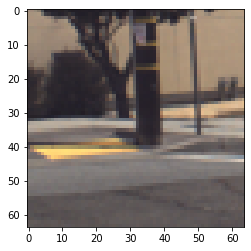

In [18]:
plt.imshow(resized[1500].transpose(1,2,0))
plt.show()

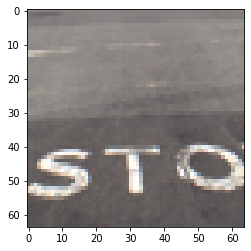

In [19]:
plt.imshow(resized[2000].transpose(1,2,0))
plt.show()

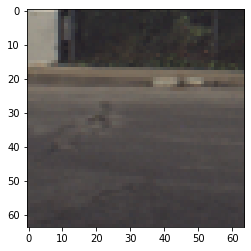

In [20]:
plt.imshow(resized[10000].transpose(1,2,0))
plt.show()

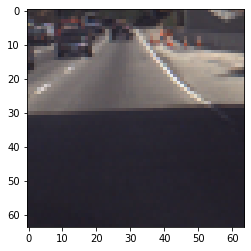

In [21]:
plt.imshow(resized[15000].transpose(1,2,0))
plt.show()

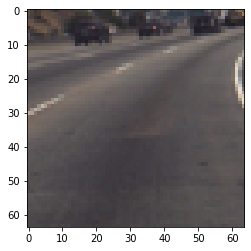

In [22]:
plt.imshow(resized[16000].transpose(1,2,0))
plt.show()

In [23]:
np.savez("/content/drive/MyDrive/CS274P/data/TrainingData.npz", images = all_images, speed = speed, accel = accel, 
         steer = steer, gas = gas, brake = brake, idx = np.array(cummulative))

In [24]:
all_data = np.load("/content/drive/MyDrive/CS274P/data/TrainingData.npz")

In [ ]:
resized = all_data['images']
plt.imshow(resized[2000].transpose(1,2,0))
plt.show()

In [ ]:
plt.imshow(resized[2000].transpose(1,2,0))
plt.show()

In [ ]:
!cat /var/log/colab-jupyter.log